In [21]:
head(iris)
table(iris$Species)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa



    setosa versicolor  virginica 
        50         50         50 

In [22]:
###Species是离散值 我们使用哑变量处理
iris_virtual = iris
iris_virtual$issetosa = ifelse(iris$Species=='setosa',1,0)
iris_virtual$isVersicolor = ifelse(iris$Species=='versicolor',1,0)
iris_virtual = iris_virtual[,-5]
head(iris_virtual)


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,issetosa,isVersicolor
5.1,3.5,1.4,0.2,1,0
4.9,3.0,1.4,0.2,1,0
4.7,3.2,1.3,0.2,1,0
4.6,3.1,1.5,0.2,1,0
5.0,3.6,1.4,0.2,1,0
5.4,3.9,1.7,0.4,1,0


In [23]:
### 样本多重线性检查
cor_1 = cor(iris_virtual)
kappa(cor_1, exact=T)

#### 291 属于100~1000之间，多重共线性的程度很小
####求矩阵的特征值和特征向量
eigen(cor_1)

[1] 291.2384

0.4174758,-0.3747495,0.28041436,0.73798414,0.1649326,0.18660452
-0.2815770,-0.5546928,0.68376457,-0.35508858,-0.1384840,0.01518477
0.4916780,-0.1708849,-0.04835535,-0.06225311,-0.4719210,-0.70719729
0.4726627,-0.2286572,-0.10600639,-0.49064417,0.6868473,-0.02403236
-0.4935122,-0.1243487,-0.04203461,0.29081690,0.4765981,-0.65383177
0.1942082,0.6744852,0.66218675,-0.01048296,0.1788995,-0.19169413


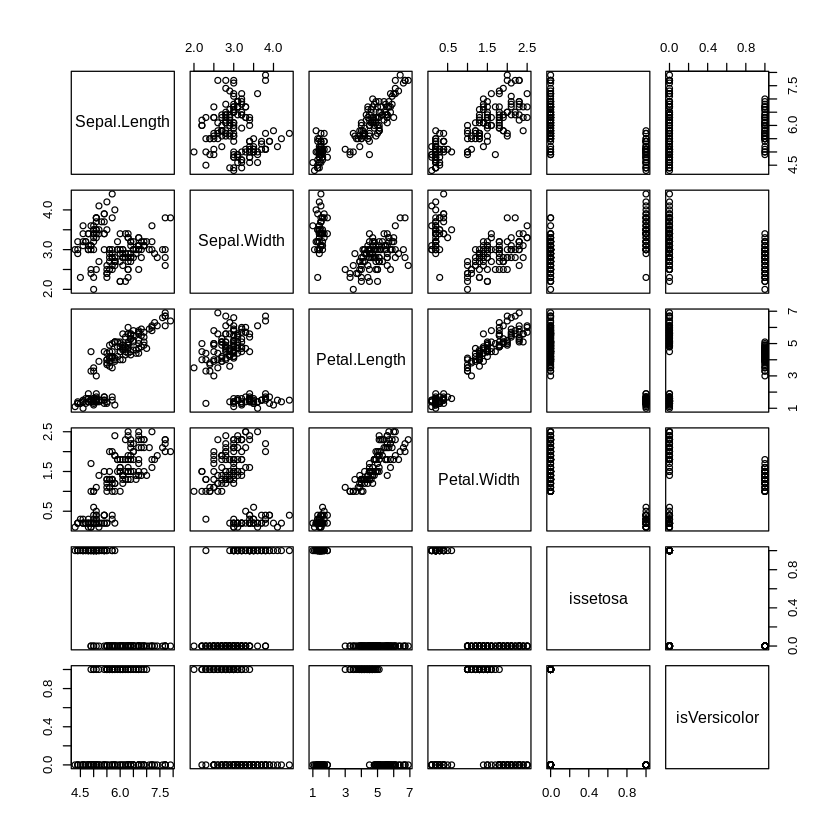

In [24]:
##一元线性回归分析
###观察散点图
plot(iris_virtual)
####可以看出来Petal.Length和Petal.Width有比较明显的线性关系。

In [25]:
###对Petal.Length和Petal.Width做一元线性回归分析
lm.plw <- lm(Petal.Length~Petal.Width+1, data=iris_virtual)
summary(lm.plw)
####结果发现，系数的t检验结果很好，都有三颗星，R平方0.93相当不错。


Call:
lm(formula = Petal.Length ~ Petal.Width + 1, data = iris_virtual)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33542 -0.30347 -0.02955  0.25776  1.39453 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.08356    0.07297   14.85   <2e-16 ***
Petal.Width  2.22994    0.05140   43.39   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4782 on 148 degrees of freedom
Multiple R-squared:  0.9271,	Adjusted R-squared:  0.9266 
F-statistic:  1882 on 1 and 148 DF,  p-value: < 2.2e-16


In [26]:
###对上面的一元线性回归模型做回归诊断
shapiro.test(iris_virtual$Petal.Width)
#### p-value<0.05,说明自变量Petal.Width不符合正态分布


	Shapiro-Wilk normality test

data:  iris_virtual$Petal.Width
W = 0.90183, p-value = 1.68e-08


In [27]:
###对残差做正态性校验
y.res<- residuals(lm.plw)
shapiro.test(y.res)
#### p-value 大于 0.05,残差符合正态分布


	Shapiro-Wilk normality test

data:  y.res
W = 0.99011, p-value = 0.3753


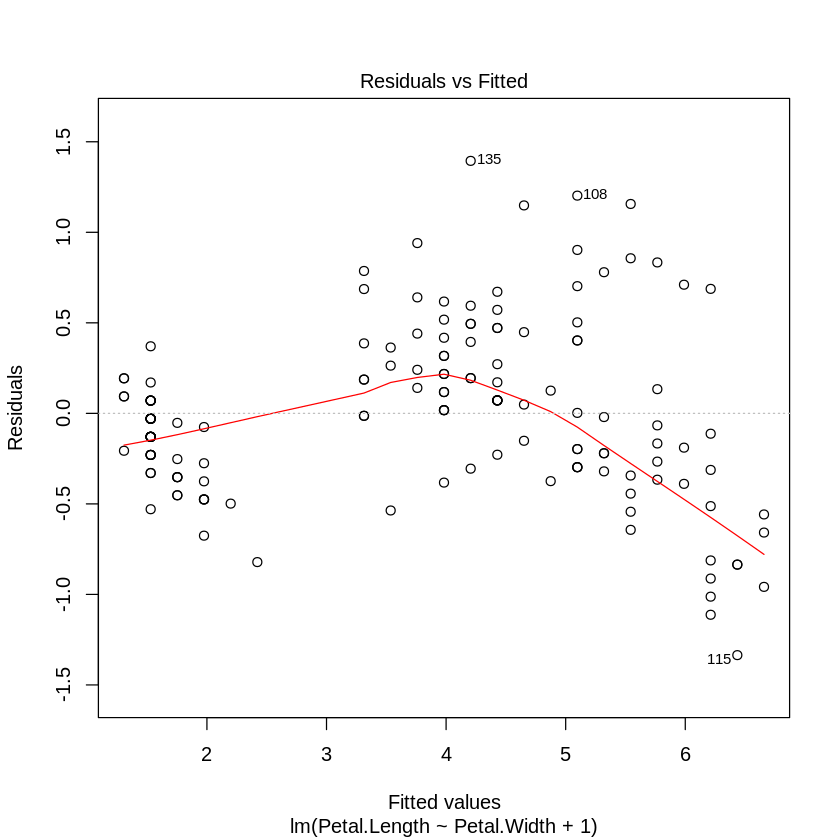

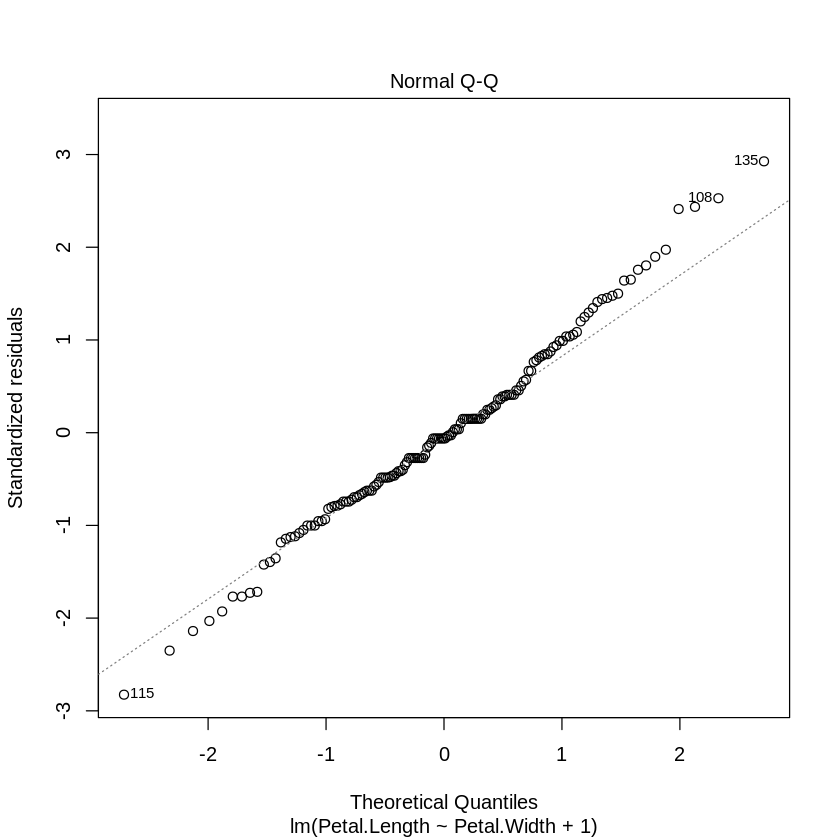

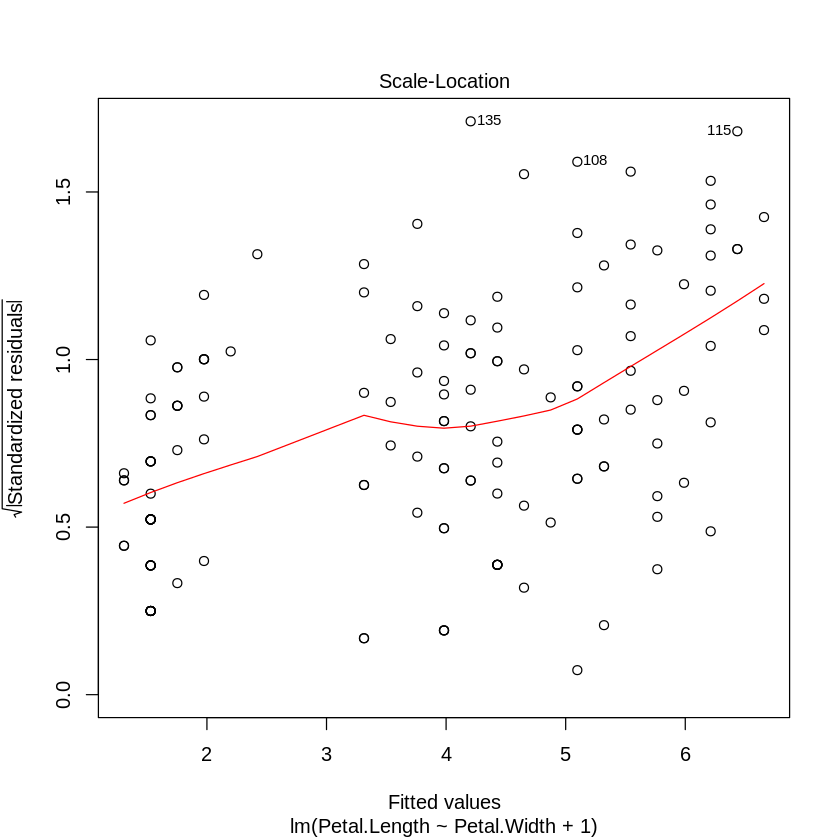

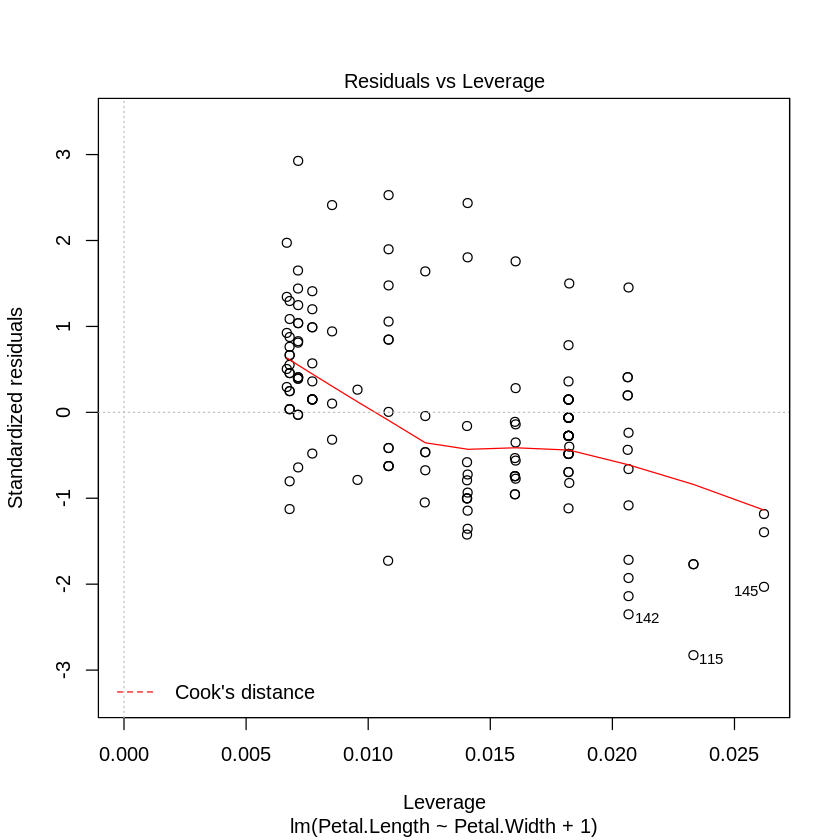

In [28]:
###观察模型的4个图
plot(lm.plw)
# 第一张图就是残差图 残差的正态分布性 判断准则：是否比较随机均匀分布在x轴附近
# 第二张图是Normal Q-Q图 残差的正态分布性 判断准则：点是否分布在一条直线上面 也会显示高杠杆值 偏离值
# 第三张图是Scale-Location图 残差的同方差性 判断准则：比较均匀的分布在水平线附近
# 第四张图是Residuals vs. leverage 看高杠杆值 Cook距离用来检测是否强影响点 

# Rvs.F还算比较随机均匀分布在x轴附近
# S-L图也是比较均匀的分布在水平线附近
# QQ图里面108,135仍然是高杠杆值，115这个点偏离比较大
# leverage图 提示注意115,142,145 三个点


In [29]:
###残差的独立性
library(car)
durbinWatsonTest(lm.plw)
####p-value<0.05，拒绝零假设：相互独立

 lag Autocorrelation D-W Statistic p-value
   1       0.2849762      1.429552   0.002
 Alternative hypothesis: rho != 0

### 结论：
    综上，关于Petal.Length与Petal.Width的一元线性回归模型样本服不服从正态分布假设，模型误差满足等方差，但不满足独立性。
线性回归模型的系数通过假设检验，相关系数平方和接近1。
此一元线性回归模型是否合理有效有待继续研究。下面做多元线性回归

In [30]:
## 多元线性回归分析

In [31]:
lm_m <-lm(Sepal.Length~., data=iris_virtual)
summary(lm_m)


Call:
lm(formula = Sepal.Length ~ ., data = iris_virtual)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79424 -0.21874  0.00899  0.20255  0.73103 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.14777    0.35356   3.246  0.00145 ** 
Sepal.Width   0.49589    0.08607   5.761 4.87e-08 ***
Petal.Length  0.82924    0.06853  12.101  < 2e-16 ***
Petal.Width  -0.31516    0.15120  -2.084  0.03889 *  
issetosa      1.02350    0.33373   3.067  0.00258 ** 
isVersicolor  0.29994    0.11898   2.521  0.01280 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3068 on 144 degrees of freedom
Multiple R-squared:  0.8673,	Adjusted R-squared:  0.8627 
F-statistic: 188.3 on 5 and 144 DF,  p-value: < 2.2e-16


In [32]:
###使用step函数做自动化逐步回归
step(lm_m, direction = 'both')

Start:  AIC=-348.57
Sepal.Length ~ Sepal.Width + Petal.Length + Petal.Width + issetosa + 
    isVersicolor

               Df Sum of Sq    RSS     AIC
<none>                      13.556 -348.57
- Petal.Width   1    0.4090 13.966 -346.11
- isVersicolor  1    0.5982 14.155 -344.09
- issetosa      1    0.8855 14.442 -341.07
- Sepal.Width   1    3.1250 16.681 -319.45
- Petal.Length  1   13.7853 27.342 -245.33



Call:
lm(formula = Sepal.Length ~ Sepal.Width + Petal.Length + Petal.Width + 
    issetosa + isVersicolor, data = iris_virtual)

Coefficients:
 (Intercept)   Sepal.Width  Petal.Length   Petal.Width      issetosa  
      1.1478        0.4959        0.8292       -0.3152        1.0235  
isVersicolor  
      0.2999  


In [33]:
###看模型参数t检验，Petal.Width和isVersicolor都是一颗星，step结果表明去掉两个自变量都不会对AIC有显著的变化
###所以尝试去掉这两个自变量
lm.mnew1<-update(lm_m, .~.-Petal.Width-isVersicolor)
summary(lm.mnew1)
####R平方变差了


Call:
lm(formula = Sepal.Length ~ Sepal.Width + Petal.Length + issetosa, 
    data = iris_virtual)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.95460 -0.23070  0.00626  0.21014  0.70840 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.12629    0.25139   8.458 2.58e-14 ***
Sepal.Width   0.48501    0.08538   5.681 7.03e-08 ***
Petal.Length  0.55906    0.04363  12.815  < 2e-16 ***
issetosa      0.39974    0.18448   2.167   0.0319 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3292 on 146 degrees of freedom
Multiple R-squared:  0.8452,	Adjusted R-squared:  0.842 
F-statistic: 265.6 on 3 and 146 DF,  p-value: < 2.2e-16


In [34]:
lm.mnew2<-update(lm.mnew1, .~.+Sepal.Width*Petal.Width )
summary(lm.mnew2)
##尝试加上二次项和乘积项以后，模型都没有得到优化



Call:
lm(formula = Sepal.Length ~ Sepal.Width + Petal.Length + issetosa + 
    Petal.Width + Sepal.Width:Petal.Width, data = iris_virtual)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.86433 -0.23113  0.01532  0.19077  0.77383 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.46035    0.41868   3.488 0.000646 ***
Sepal.Width              0.66185    0.13138   5.038 1.39e-06 ***
Petal.Length             0.76245    0.06452  11.817  < 2e-16 ***
issetosa                 0.29861    0.17676   1.689 0.093326 .  
Petal.Width             -0.21389    0.34931  -0.612 0.541299    
Sepal.Width:Petal.Width -0.09837    0.10188  -0.966 0.335895    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3125 on 144 degrees of freedom
Multiple R-squared:  0.8623,	Adjusted R-squared:  0.8576 
F-statistic: 180.4 on 5 and 144 DF,  p-value: < 2.2e-16


In [35]:
##回归诊断 针对多元回归模型lm.m的自变量 Sepal.Width + Petal.Length + Petal.Width + issetosa + isVersicolor
shapiro.test(iris_virtual$Sepal.Width)
shapiro.test(iris_virtual$Petal.Length)
shapiro.test(iris_virtual$issetosa)
shapiro.test(iris_virtual$Petal.Width)
shapiro.test(iris_virtual$isVersicolor)
###其中Sepal.Width是正态分布，其他4个自变量不是正态分布


	Shapiro-Wilk normality test

data:  iris_virtual$Sepal.Width
W = 0.98492, p-value = 0.1012



	Shapiro-Wilk normality test

data:  iris_virtual$Petal.Length
W = 0.87627, p-value = 7.412e-10



	Shapiro-Wilk normality test

data:  iris_virtual$issetosa
W = 0.59467, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  iris_virtual$Petal.Width
W = 0.90183, p-value = 1.68e-08



	Shapiro-Wilk normality test

data:  iris_virtual$isVersicolor
W = 0.59467, p-value < 2.2e-16


In [36]:
###对残差做正态性校验
ym.res<- residuals(lm_m)
shapiro.test(ym.res)
#### p-value 大于 0.05,残差符合正态分布


	Shapiro-Wilk normality test

data:  ym.res
W = 0.99538, p-value = 0.9202


In [37]:
###残差的独立性
library(car)
durbinWatsonTest(lm_m)
####p-value >0.05，通过独立性检验

 lag Autocorrelation D-W Statistic p-value
   1      0.01099141      1.965705   0.712
 Alternative hypothesis: rho != 0

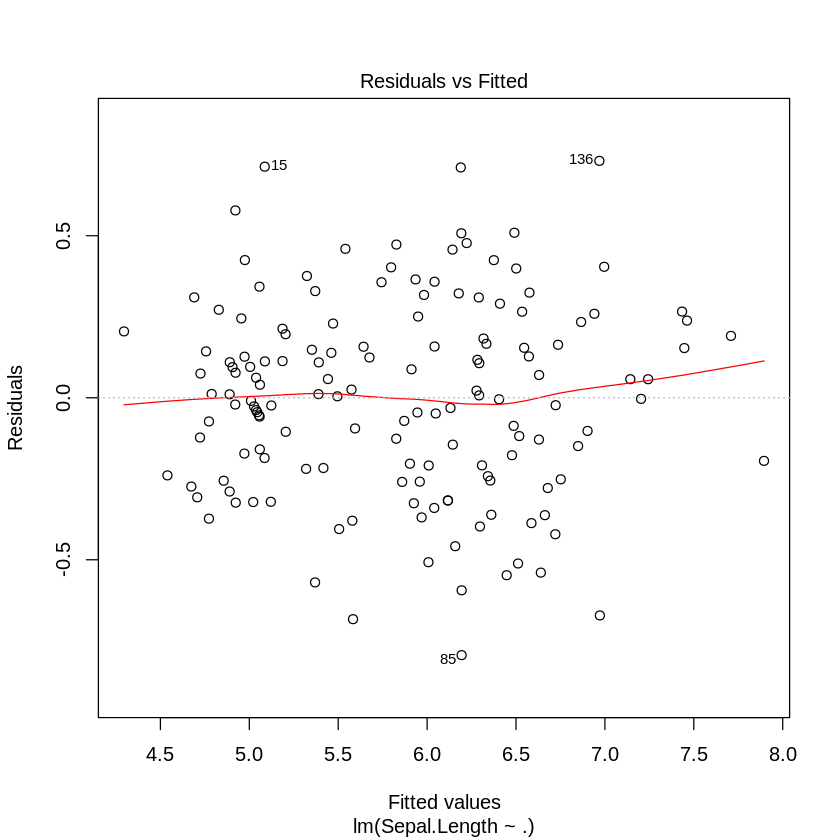

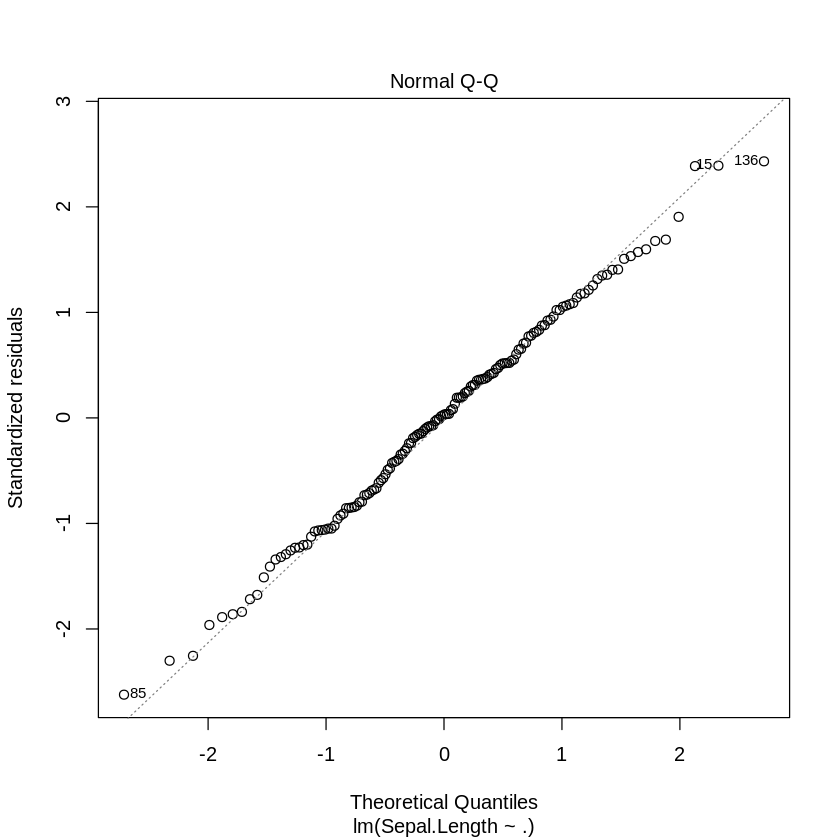

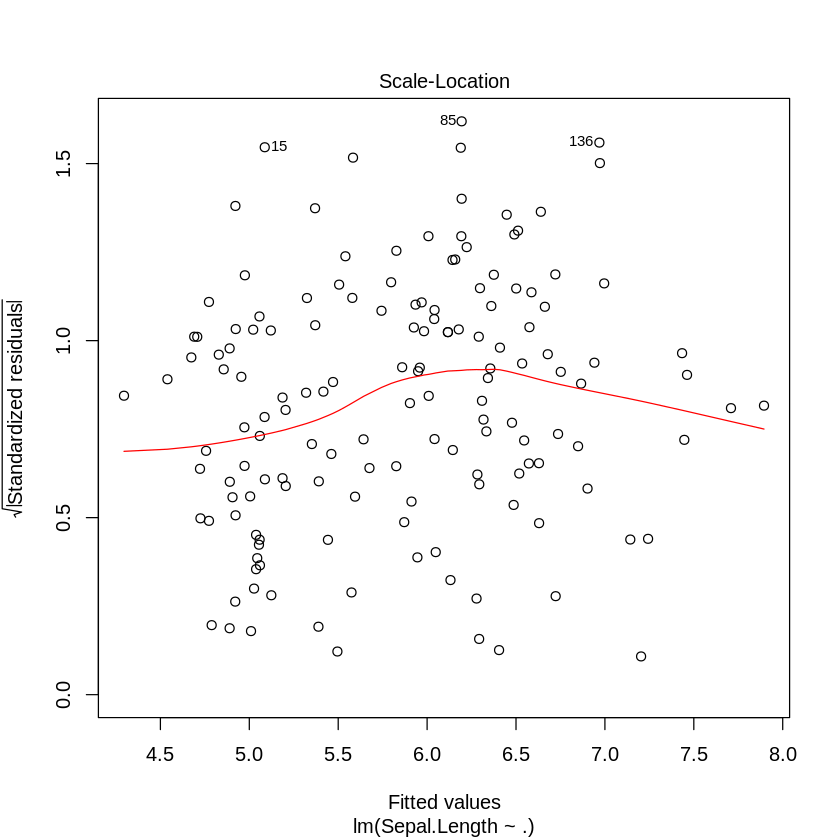

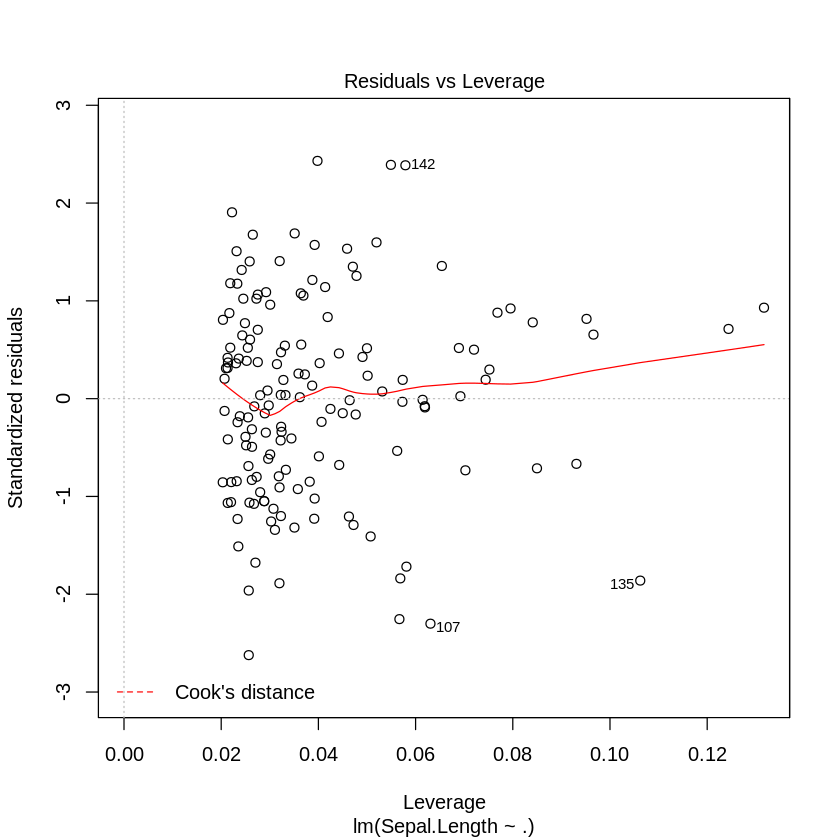

In [38]:
###观察模型的4个图
plot(lm_m)
# Rvs.F还算比较随机均匀分布在x轴附近(比刚才的一元回归模型好)
# S-L图也是比较均匀的分布在水平线附近(也比刚才的一元回归模型好)
# QQ图里面15,136仍然是高杠杆值，85这个点偏离比较大
# leverage图 提示注意15,85,136 三个点


## 结论：
综上，关于Petal.Length的多元线性回归模型样本不服从正态分布假设，模型误差满足等方差和独立性。
线性回归模型的系数通过假设检验，相关系数平方和接近1。 此多元线性回归比较合理。